In [10]:
import sys
!{sys.executable} -m pip install pydotplus

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
import pydotplus

In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv("dataset\diabetes.csv", header=1, names=col_names)
print(data.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         1       85  66    29        0  26.6     0.351   31      0
1         8      183  64     0        0  23.3     0.672   32      1
2         1       89  66    23       94  28.1     0.167   21      0
3         0      137  40    35      168  43.1     2.288   33      1
4         5      116  74     0        0  25.6     0.201   30      0


In [13]:
print("splitting data into features and target variables")
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y = data.label

splitting data into features and target variables


In [14]:
print("splitting dataset into training set and test set")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print("creating decision tree classifier object")
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
print("training decision tree classifier")
clf = clf.fit(x_train, y_train)
print("predicting the response for test dataset")
y_pred = clf.predict(x_test)
print("claculating model accuracy how often is the classifier correct")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

splitting dataset into training set and test set
creating decision tree classifier object
training decision tree classifier
predicting the response for test dataset
claculating model accuracy how often is the classifier correct
Accuracy: 0.6883116883116883


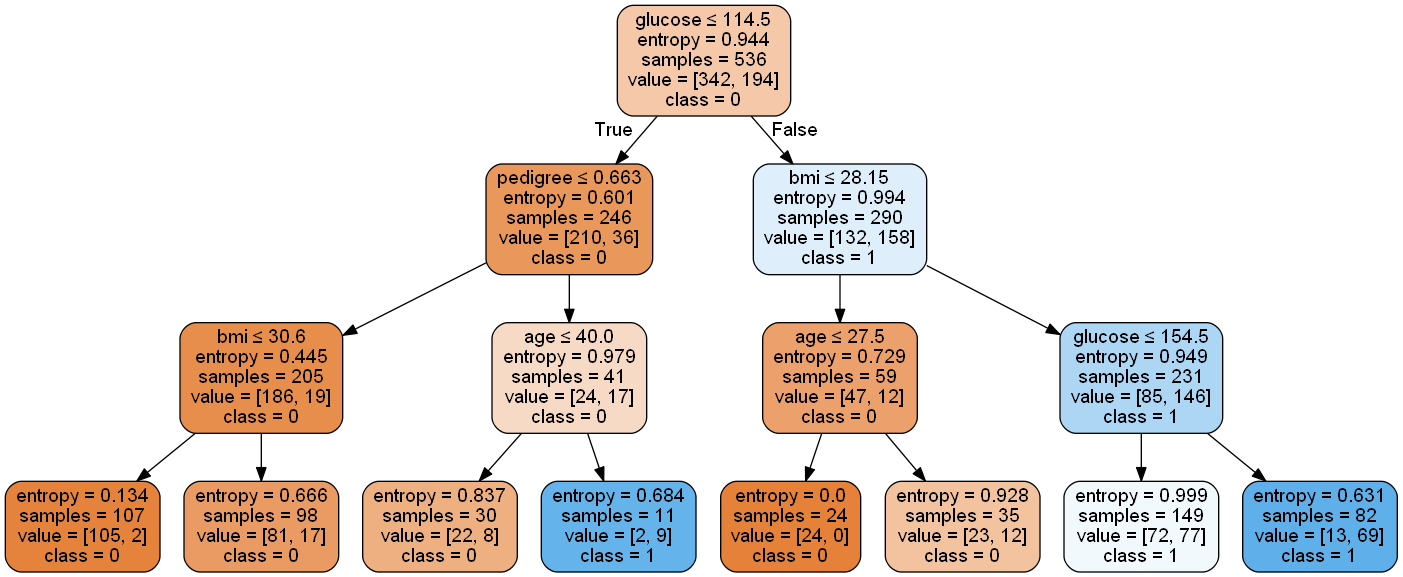

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols,
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [16]:
col_names = ['day', 'weather', 'temperature', 'humidity','wind', 'play']
data = pd.read_csv("dataset\weather.csv", header=0, names=col_names)
print(data.head())

   day weather temperature humidity    wind play
0    1   Sunny         hot     High    Weak   No
1    2  Cloudy         hot     High    Weak  Yes
2    3   Sunny        Mild   Normal  Strong  Yes
3    4  Cloudy        Mild     High  Strong  Yes
4    5   Rainy        Mild     High  Strong   No


In [17]:
print("splitting data into features and target variables")
feature_cols = ['day', 'weather', 'temperature', 'humidity', 'wind']
x = data[feature_cols]
y = data.play
u = data.iloc[:, [0,1,2,3,4]].values # Here first : means fetch all rows :-1 means except last column

v = data.iloc[:, [5]].values # : is fetch all rows 5 means 5th column
print(u)
print(v)

splitting data into features and target variables
[[1 'Sunny' 'hot' 'High' 'Weak']
 [2 'Cloudy' 'hot' 'High' 'Weak']
 [3 'Sunny' 'Mild' 'Normal' 'Strong']
 [4 'Cloudy' 'Mild' 'High' 'Strong']
 [5 'Rainy' 'Mild' 'High' 'Strong']
 [6 'Rainy' 'Cool' 'Normal' 'Strong']
 [7 'Rainy' 'Mild' 'High' 'Weak']
 [8 'Sunny' 'hot' 'High' 'Strong']
 [9 'Cloudy' 'hot' 'Normal' 'Weak']
 [10 'Rainy' 'Mild' 'High' 'Strong']]
[['No']
 ['Yes']
 ['Yes']
 ['Yes']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']]


In [18]:
labelencoder_X = LabelEncoder()
u[:,1] = labelencoder_X.fit_transform(u[:,1])# All rows and first column i.e weather column
u[:,2] = labelencoder_X.fit_transform(u[:,2])
u[:,3] = labelencoder_X.fit_transform(u[:,3])
u[:,4] = labelencoder_X.fit_transform(u[:,4])
print(u)

labelencoder_y = LabelEncoder()

v= labelencoder_y.fit_transform(v)

print(v)

[[1 2 2 0 1]
 [2 0 2 0 1]
 [3 2 1 1 0]
 [4 0 1 0 0]
 [5 1 1 0 0]
 [6 1 0 1 0]
 [7 1 1 0 1]
 [8 2 2 0 0]
 [9 0 2 1 1]
 [10 1 1 0 0]]
[0 1 1 1 0 0 1 0 1 0]


d:\python37\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(u, v, random_state=0)
#print("creating decision tree classifier object")
clf = DecisionTreeClassifier(criterion="entropy")
#print("training decision tree classifier")

clf = clf.fit(x_train, y_train)
#print("predicting the response for test dataset")
y_pred = clf.predict(x_test)
#print("claculating model accuracy how often is the classifier correct")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print()

Accuracy: 0.6666666666666666



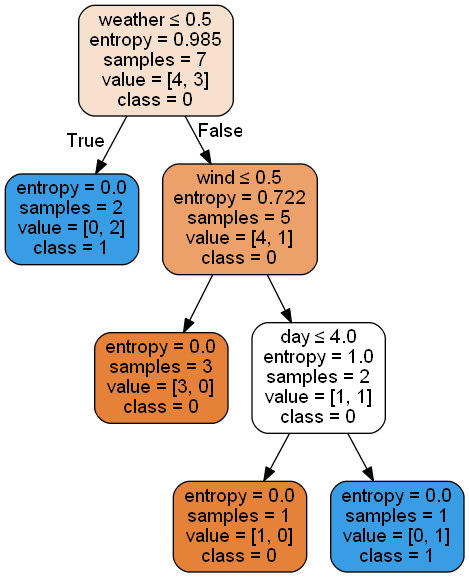

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols,
                class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('weather.png')
Image(graph.create_png())